In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

In [3]:
import s3fs 
import AFQ.data as afd
fs = s3fs.S3FileSystem()

/Users/arokem/miniconda3/envs/afq/lib/python3.8/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/arokem/miniconda3/envs/afq/lib/python3.8/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


In [4]:
import os.path as op

In [5]:
ll = fs.ls("hcp.dki/derivatives/dki1000_3000")

In [6]:
subjects = [ff.split('-')[1] for ff in ll]

In [7]:
len(subjects)

1064

In [8]:
subject = subjects[-1]

In [9]:
subject

'996782'

In [10]:
bucket = 'hcp.dki'

In [11]:
remote_dti1000_path =\
    "%s/derivatives/dti1000" % (bucket)

remote_dti1000_2000_path =\
    "%s/derivatives/dti1000_2000" % (bucket)

remote_dki1000_2000_path =\
    "%s/derivatives/dki1000_2000" % (bucket)

remote_dki2000_3000_path =\
    "%s/derivatives/dki2000_3000" % (bucket)

remote_dki1000_3000_path =\
    "%s/derivatives/dki1000_3000" % (bucket)


In [12]:
mad_dti = []
med_dti = []
mad_dki = []
med_dki = []

In [13]:
#rm reliability_comparison.csv

In [14]:
reliability_table = "reliability_comparison.csv"

if not op.exists(reliability_table):
    for subject in subjects:
        print(subject)
        rpath = op.join(remote_dti1000_path, f'sub-{subject}', 'ses-01', 'dwi',
                                f'sub-{subject}_dwi_model-DTI_FA.nii.gz')

        img_fa1000 = afd.s3fs_nifti_read(rpath)

        rpath = op.join(remote_dti1000_2000_path, f'sub-{subject}', 'ses-01', 'dwi',
                                f'sub-{subject}_dwi_model-DTI_FA.nii.gz')

        img_fa1000_2000 = afd.s3fs_nifti_read(rpath)

        fa1000 = img_fa1000.get_fdata()

        fa1000_2000 = img_fa1000_2000.get_fdata()

        img_wm_mask =  afd.s3fs_nifti_read(f's3://hcp.dki/derivatives/wm_mask/sub-{subject}/ses-01/dwi/sub-{subject}_dwi_wm_mask.nii.gz')

        data_wm_mask = img_wm_mask.get_fdata().astype(bool)

        fa1000_wm = fa1000[data_wm_mask]
        fa1000_2000_wm = fa1000_2000[data_wm_mask]

        rpath = op.join(remote_dki1000_2000_path, f'sub-{subject}', 'ses-01', 'dwi',
                        f'sub-{subject}_dwi_model-DKI_FA.nii.gz')

        img_dki_fa1000_2000 = afd.s3fs_nifti_read(rpath)

        rpath = op.join(remote_dki1000_3000_path, f'sub-{subject}', 'ses-01', 'dwi',
                        f'sub-{subject}_dwi_model-DKI_FA.nii.gz')

        img_dki_fa1000_3000 = afd.s3fs_nifti_read(rpath)

        dki_fa1000_3000 = img_dki_fa1000_3000.get_fdata()

        dki_fa1000_2000 = img_dki_fa1000_2000.get_fdata()

        dki_fa1000_2000_wm = dki_fa1000_2000[data_wm_mask]
        dki_fa1000_3000_wm = dki_fa1000_3000[data_wm_mask]
        diff_dti = fa1000_2000_wm-fa1000_wm
        diff_dki = dki_fa1000_3000_wm-dki_fa1000_2000_wm
        mad_dti.append(np.median(np.abs(diff_dti)))
        med_dti.append(np.median(diff_dti))
        mad_dki.append(np.median(np.abs(diff_dki)))
        med_dki.append(np.median(diff_dki))
        
    mad_df = pd.DataFrame(data=dict(subjects=subjects, 
                            mad_dti=mad_dti, 
                            med_dti=med_dti, 
                            mad_dki=mad_dki,
                            med_dki=med_dki))

    mad_df.to_csv(reliability_table)
    np.savez('reliability_variables_fa.npz',
             diff_dki=diff_dki,
             diff_dti=diff_dti,
             mad_dti=mad_dti, 
             med_dti=med_dti, 
             mad_dki=mad_dki,
             med_dki=med_dki
            )
else:
    mad_df = pd.read_csv(reliability_table)
    with np.load('reliability_variables_fa.npz') as data:
        diff_dti=data['diff_dti']
        diff_dki=data['diff_dki']
        mad_dti = data['mad_dti']
        med_dti = data['med_dti']
        mad_dki = data['mad_dki']
        med_dki = data['med_dki']

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


100206
100307
100408
100610
101006
101107
101309
101410
101915
102008
102109
102311
102513
102614
102715
102816
103010
103111
103212
103414
103515
103818
104012
104416
104820
105014
105115
105216
105620
105923
106016
106319
106521
106824
107018
107321
107422
107725
108020
108121
108222
108323
108525
108828
109123
109830
110007
110411
110613
111009
111211
111312
111413
111514
111716
112112
112314
112516
112819
112920
113215
113316
113619
113821
113922
114116
114217
114318
114419
114621
114823
115017
115219
115320
115724
115825
116221
116423
116524
116726
117021
117122
117324
117930
118023
118124
118225
118528
118730
118831
118932
119025
119126
119732
119833
120010
120111
120212
120414
120515
120717
121416
121618
121719
121921
122317
122418
122620
122822
123117
123420
123521
123723
123824
123925
124220
124422
124624
124826
125222
125424
125525
126325
126426
126628
127226
127327
127630
127731
127832
127933
128026
128127
128632
128935
129028
129129
129331
129634
129937
130013
130114
130316

In [15]:
mad_dti

[0.0311230909439138,
 0.027902883376616547,
 0.026527129676549827,
 0.027062920389830047,
 0.024645838733313982,
 0.027249294863819662,
 0.02734765378931031,
 0.028491997406568076,
 0.0267512457831125,
 0.027699567607227027,
 0.027925975405162715,
 0.02718857404768893,
 0.02829623834019257,
 0.029000853027904894,
 0.02946761159024791,
 0.02782561447179875,
 0.028834836561028504,
 0.02568427744620627,
 0.028026580006868362,
 0.025683586876858677,
 0.02820837833611331,
 0.025705164270745373,
 0.025117027706755446,
 0.02928938123204683,
 0.02528373184321092,
 0.026382080714068862,
 0.02480747688024243,
 0.028039560203865443,
 0.026185621154326322,
 0.027344395865254223,
 0.025389630594860213,
 0.028664651512460504,
 0.027249158764915238,
 0.028804129485343,
 0.028156554605732298,
 0.029077275863383267,
 0.02832764606963868,
 0.027735316821281275,
 0.02704313071644454,
 0.02552556882596435,
 0.02688581983338245,
 0.027252938803420612,
 0.026602068062228534,
 0.02641138600522408,
 0.0278832

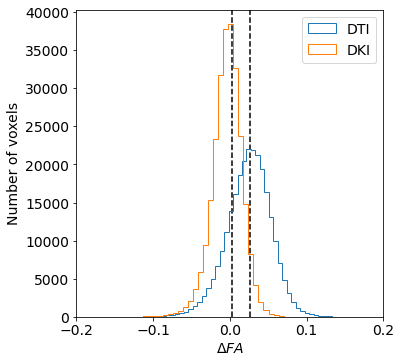

In [22]:
fig, ax = plt.subplots()
ax.hist(diff_dti, histtype='step', bins=200, label="DTI")
ax.hist(diff_dki, histtype='step', bins=200, label="DKI")
ax.set_xlim([-0.2, 0.2])
ylims = ax.get_ylim()
ax.vlines(np.median(diff_dti), *ylims, color='k', linestyle='--')
ax.vlines(-np.median(diff_dki), *ylims, color='k', linestyle='--')
ax.set_ylim(ylims)
ax.set_xlabel("$\Delta FA$")
ax.set_ylabel("Number of voxels")
ax.set_box_aspect(1)
plt.legend()
fig.set_size_inches([5.8, 5.8])
fig.set_tight_layout(True)
fig.savefig("single_subject_reliability_fa.png")

In [17]:
np.median(diff_dki)

-0.002672160086994113

In [18]:
mad_df = pd.DataFrame(data=dict(subjects=subjects, 
                                mad_dti=mad_dti, 
                                med_dti=med_dti, 
                                mad_dki=mad_dki,
                                med_dki=-np.array(med_dki)))


In [19]:
import seaborn as sns

In [28]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

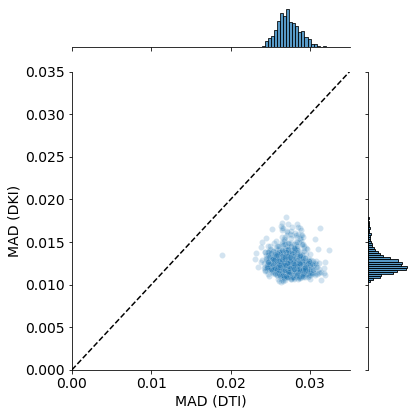

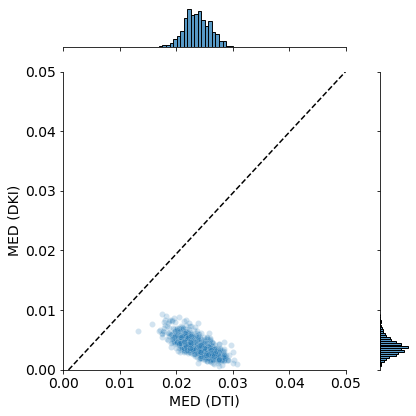

In [29]:
#fig, ax = plt.subplots(1,2)
pp = sns.jointplot(data=mad_df, x="mad_dti", y="mad_dki", alpha=0.2)
pp.ax_joint.set_xlabel("MAD (DTI)")
pp.ax_joint.set_ylabel("MAD (DKI)")
pp.ax_joint.set_xlim([0, 0.035])
pp.ax_joint.set_ylim([0, 0.035])
pp.ax_joint.plot([0, 0.035], [0, 0.035], 'k--')
#pp.ax_joint.text(0.1, 0.9, 'B', horizontalalignment='center',verticalalignment='center', transform=pp.ax_joint.transAxes, fontsize=20)
pp.fig.savefig("hcp_reliability_fa_mad.png")

pp = sns.jointplot(data=mad_df, x="med_dti", y="med_dki", alpha=0.2)
pp.ax_joint.set_xlabel("MED (DTI)")
pp.ax_joint.set_ylabel("MED (DKI)")
pp.ax_joint.set_xlim([0, 0.05])
pp.ax_joint.set_ylim([0, 0.05])
pp.ax_joint.plot([0, 0.05], [-0.001, 0.05], 'k--')
#pp.ax_joint.text(0.1, 0.9, 'C', horizontalalignment='center',verticalalignment='center', transform=pp.ax_joint.transAxes, fontsize=20)
pp.fig.savefig("hcp_reliability_fa_med.png")

In [21]:
!open .